In [1]:
#importing the usefull libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# importing the data 
df_train = pd.read_csv('sample_train.csv')

In [4]:
# reading the first five columns in a dataset
df_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# total count of the dataset
df_train.shape

(200000, 9)

In [5]:
# datatypes of the dataset
df_train.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
# droping the unusual columns 

df_train.drop('Unnamed: 0',axis = 1,inplace = True)


In [7]:
# checking the null values in DataFrame
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
# Removing the null values those are very less
df = df_train.dropna(how = 'any')


In [9]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df_final = df.copy()

### preprocessing the date and time columns

In [8]:
df_final['pickup_datetime']=pd.to_datetime(df_final['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
df_final['pickup_date']= df_final['pickup_datetime'].dt.date
df_final['pickup_day']=df_final['pickup_datetime'].apply(lambda x:x.day)
df_final['pickup_hour']=df_final['pickup_datetime'].apply(lambda x:x.hour)
df_final['pickup_month']=df_final['pickup_datetime'].apply(lambda x:x.month)
df_final['pickup_year']=df_final['pickup_datetime'].apply(lambda x:x.year)

In [9]:
# droping the unwanted columns 
df_final.drop(columns = ['key','pickup_datetime'],axis = 1,inplace = True)

In [10]:
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,7,19,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,17,20,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,24,21,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,26,8,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,28,17,8,2014


In [26]:
df_final.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_date           object
pickup_day             int64
pickup_hour            int64
pickup_month           int64
pickup_year            int64
dtype: object

### finding the distace between the pickup and drop locations

In [11]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(df_final):
    lat1 = df_final['pickup_latitude']
    lon1 = df_final['pickup_longitude']
    lon2 = df_final['dropoff_longitude']
    lat2 = df_final['dropoff_latitude']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

df_final['distance/km'] = df_final.apply(lambda row: haversine(row), axis=1)




In [12]:
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year,distance/km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,7,19,5,2015,1.682266
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,17,20,7,2009,2.456047
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,24,21,8,2009,5.033215
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,26,8,6,2009,1.660640
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,28,17,8,2014,4.472640


In [13]:
df_final.drop(columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1,inplace = True)

In [14]:
df_final.head()

,fare_amount,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year,distance/km
0,7.5,1,2015-05-07,7,19,5,2015,1.682266
1,7.7,1,2009-07-17,17,20,7,2009,2.456047
2,12.9,1,2009-08-24,24,21,8,2009,5.033215
3,5.3,3,2009-06-26,26,8,6,2009,1.660640
4,16.0,5,2014-08-28,28,17,8,2014,4.472640


#### 1.Trip distance : If the distance to be traveled is more, then fare should be higher.

#### 2.Time of Travel : During peak traffic hours, the taxi fare may be higher.

#### 3.Day of Travel : Fare amount may differ on weekday and weekends

#### 4.Weather Conditions : If it is snowing, there may be lower availability of cabs and hence higher fares.

#### 5.Is it a trip to/from airport : Trips to/from airport generally have a fixed fare.

#### 6.Pickup or Drop-off Neighborhood : Fare may be different based on the kind of neighborhood.

#### 7.Availability of taxi : If a particular location has a lot of cabs available, the fares may be lower

### Distributions of continuous data

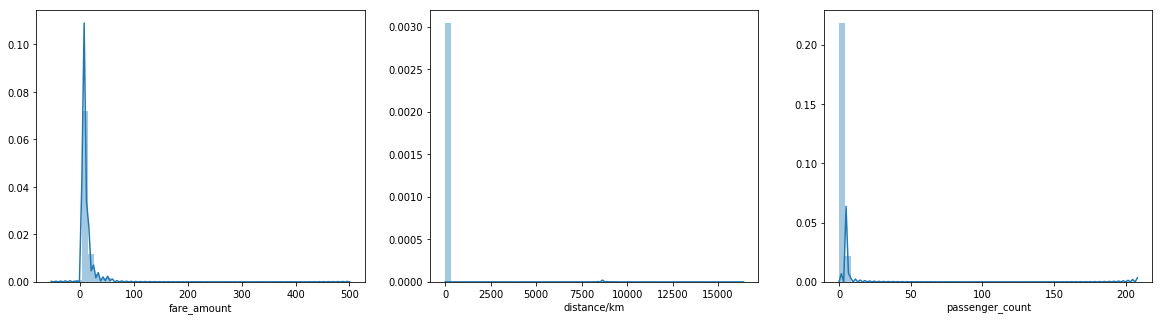

In [34]:
plt.figure(figsize=(20,5));
plt.subplot(131);
sns.distplot(df_final['fare_amount']);
plt.subplot(132);
sns.distplot(df_final['distance/km']);
plt.subplot(133);
sns.distplot(df_final['passenger_count']);


Text(0.5, 1.0, 'Distribution of Trip Fare')

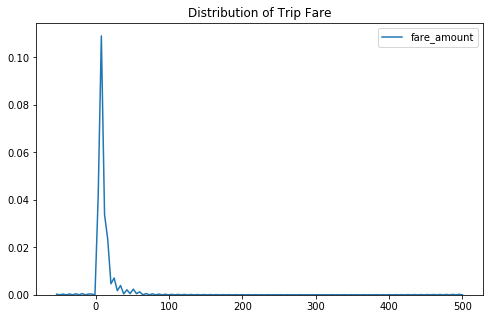

In [40]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_final['fare_amount']).set_title("Distribution of Trip Fare")

In [41]:
df_final.loc[df_final['fare_amount']<0].shape

(17, 8)

### There are 17 records with negative fare. We will remove these records from the data

In [15]:
df_final=df_final.loc[df_final['fare_amount']>=0]
df_final.shape


(199982, 8)

#### Since we saw above that fare amount is highly skewed,let us take log transformation of the fare amount and plot the distribution

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

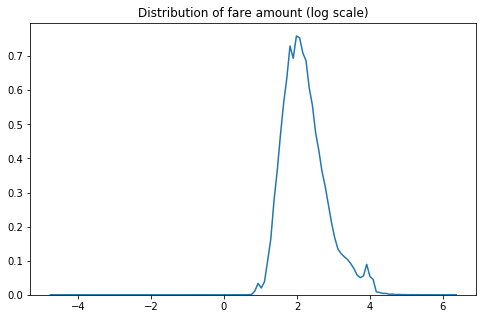

In [43]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_final['fare_amount'].values)).set_title("Distribution of fare amount (log scale)")

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

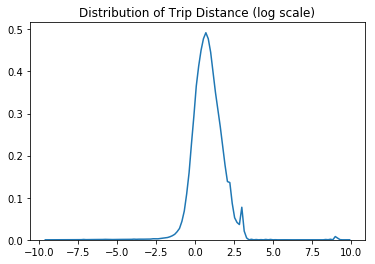

In [44]:
sns.kdeplot(np.log(df_final['distance/km'].values)).set_title("Distribution of Trip Distance (log scale)")

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

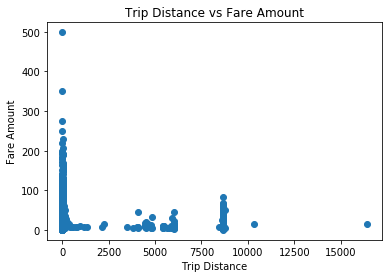

In [45]:
plt.scatter(x=df_final['distance/km'],y=df_final['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

Text(0.5, 1.0, 'Avg Fare Amount over Years')

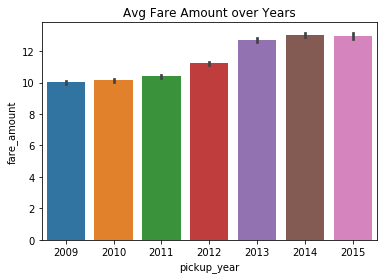

In [46]:
sns.barplot(x='pickup_year',y='fare_amount',data=df_final).set_title("Avg Fare Amount over Years")

#### Avg Fare amount has beern increasing over the years.



In [16]:
bin_labels_4 = [1,2,3,4]
df_final['pickup_hour_class'] = pd.qcut(df_final['pickup_hour'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels_4)
df_final.head()

,fare_amount,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year,distance/km,pickup_hour_class
0,7.5,1,2015-05-07,7,19,5,2015,1.682266,3
1,7.7,1,2009-07-17,17,20,7,2009,2.456047,4
2,12.9,1,2009-08-24,24,21,8,2009,5.033215,4
3,5.3,3,2009-06-26,26,8,6,2009,1.660640,1
4,16.0,5,2014-08-28,28,17,8,2014,4.472640,3


In [17]:
df_final_train = df_final[['fare_amount','passenger_count','distance/km','pickup_hour_class']]

In [18]:
df_final_train.head()

,fare_amount,passenger_count,distance/km,pickup_hour_class
0,7.5,1,1.682266,3
1,7.7,1,2.456047,4
2,12.9,1,5.033215,4
3,5.3,3,1.660640,1
4,16.0,5,4.472640,3


### Splitting the data into Train and test

In [19]:
from sklearn.model_selection import train_test_split
X=df_final_train.drop(['fare_amount'],axis=1)
y=df_final_train['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)
#test_size is the proportion of data that is to be kept aside for validation

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error


In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred_lr = lr.predict(X_test)

In [23]:
y_pred_lr

array([11.53007155, 11.04291005, 11.53348905, ..., 11.80602504,
       11.32177774, 11.73791513])

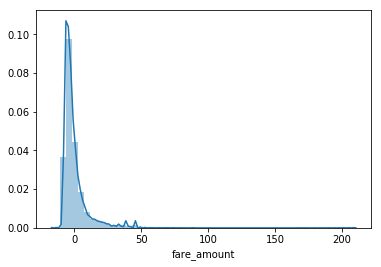

In [24]:
sns.distplot(y_test-y_pred_lr)

### Test data preprocessing

In [25]:
df_test = pd.read_csv('sample_test.csv')

In [26]:
df_test.dtypes

Unnamed: 0             int64
Unnamed: 0.1           int64
Unnamed: 0.1.1         int64
key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [27]:
df_test = df_test.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis = 1)

In [28]:
df_test = df_test.dropna(how = 'any')


In [29]:
df_test['pickup_datetime']=pd.to_datetime(df_test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
df_test['pickup_date']= df_test['pickup_datetime'].dt.date
df_test['pickup_day']=df_test['pickup_datetime'].apply(lambda x:x.day)
df_test['pickup_hour']=df_test['pickup_datetime'].apply(lambda x:x.hour)
df_test['pickup_month']=df_test['pickup_datetime'].apply(lambda x:x.month)
df_test['pickup_year']=df_test['pickup_datetime'].apply(lambda x:x.year)

In [30]:
df_test.drop(columns = ['key','pickup_datetime'],axis = 1,inplace = True)

In [31]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(df_test):
    lat1 = df_test['pickup_latitude']
    lon1 = df_test['pickup_longitude']
    lon2 = df_test['dropoff_longitude']
    lat2 = df_test['dropoff_latitude']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

df_test['distance/km'] = df_test.apply(lambda row: haversine(row), axis=1)



In [32]:
df_test.drop(columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1,inplace = True)

In [33]:
df_test.head()

,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year,distance/km
0,1,2011-02-10,10,19,2,2011,3.848144
1,1,2011-06-23,23,9,6,2011,2.133239
2,6,2012-07-14,14,10,7,2012,1.051195
3,1,2014-10-19,19,22,10,2014,3.983222
4,1,2015-05-25,25,22,5,2015,3.925003


In [34]:
bin_labels_4 = [1,2,3,4]
df_test['pickup_hour_class'] = pd.qcut(df_test['pickup_hour'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels_4)
df_test.head()

,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_year,distance/km,pickup_hour_class
0,1,2011-02-10,10,19,2,2011,3.848144,3
1,1,2011-06-23,23,9,6,2011,2.133239,1
2,6,2012-07-14,14,10,7,2012,1.051195,2
3,1,2014-10-19,19,22,10,2014,3.983222,4
4,1,2015-05-25,25,22,5,2015,3.925003,4


In [35]:
df_final_test = df_test[['passenger_count','distance/km','pickup_hour_class']]

In [36]:
df_final_test.head()

,passenger_count,distance/km,pickup_hour_class
0,1,3.848144,3
1,1,2.133239,1
2,6,1.051195,2
3,1,3.983222,4
4,1,3.925003,4


In [37]:
y_pred_test = lr.predict(df_final_test)

In [38]:
df_final_test['fare_amount'] = y_pred_test

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_final_test.head()

,passenger_count,distance/km,pickup_hour_class,fare_amount
0,1,3.848144,3,11.207978
1,1,2.133239,1,11.531557
2,6,1.051195,2,11.711359
3,1,3.983222,4,11.045685
4,1,3.925003,4,11.045644


### Random Forest Regressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf_pred= rf.predict(df_final_test)


In [131]:
df_final_test['fare_amount'] = rf_pred

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
df_final_test.head()

,passenger_count,distance/km,pickup_hour_class,fare_amount
0,1,3.848144,3,14.419
1,1,2.133239,1,8.362
2,6,1.051195,2,7.147
3,1,3.983222,4,11.353
4,1,3.925003,4,9.646


In [135]:
df_final_test.to_csv('final_pred.csv')
final_pred.save()